In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import tree
import time

In [2]:
########################################################
# car_df is the dataframe load from veh_tx
# df is the car_df dataframe that already group by, calculate the parking duration and assign shopping_point
########################################################

#################################################### STEP 1: Load Dataset #####################################################################

car_df1 = pd.read_csv('G:\\My Drive\\ITS_DA\\veh_tx_data\\2019-11-10_15.zip', compression='zip')
car_df2 = pd.read_csv('G:\\My Drive\\ITS_DA\\veh_tx_data\\2019-11-10_18.zip', compression='zip')

#############################################################################################################################################

#################################################### STEP 1.5: Data Processing ##############################################################
# car_df1.isna().sum()
# car_df2.isna().sum()
car_df1.dropna(inplace=True)
car_df2.dropna(inplace=True)

car_df = pd.concat([car_df1,car_df2])
# print(car_df.isna().sum())

# print(car_df.info())
# print(car_df.head(50))
# print(shopping_df.head())

In [3]:
car_df.head(20)

,time_stamp,vid,lat,lon,speed,unit_type
0,2019-11-10 15:00:11,C240E85CD6C30CAC3FEECF765FBECA30BDB6D9A6,16.147610,101.907509,0,8.0
1,2019-11-10 15:00:19,D4C0E97A90CA51EEEE3D6A42A4E65D9234FBE5BA,15.273096,104.837271,0,1.0
2,2019-11-10 15:00:00,08A279E01A70B1468F3FDC06C9139401F46BF2B9,14.188940,100.607180,0,5.0
3,2019-11-10 15:00:00,08A279E01A70B1468F3FDC06C9139401F46BF2B9,14.188940,100.607180,0,5.0
4,2019-11-10 15:00:05,2392305CF64954697BB3D47512DD3F5750FDCB75,12.250213,102.605698,60,7.0
5,2019-11-10 15:00:25,77DE577CCD7024D0EF8CE815937AB81494F1AB40,14.908216,100.381162,21,8.0
7,2019-11-10 15:00:17,A6332CCA82041DE374639FEFF7C755C47AF0385E,14.276052,101.038719,0,8.0
8,2019-11-10 15:00:02,795864228406864F22697594AA31A2FC21C1BFA1,17.304990,102.187080,0,8.0
9,2019-11-10 15:00:08,48C32FD8889980098178653962B0CE9C8C3C9816,17.371870,102.822037,0,8.0
10,2019-11-10 15:00:59,FE98AD4FC27821772CE8AAFE4CE4BFFAA8565907,14.141842,99.839593,0,8.0


In [4]:
# Calculate Time Elpased to detemine that which point is a shopping point
car_df["time_stamp"] = pd.to_datetime(car_df["time_stamp"])


##########################################################################################################

# Round Latitude Longitude to 1 digit float
car_df["latx"] = round(car_df["lat"], 1)
car_df["lonx"] = round(car_df["lon"], 1)

# Round Latitude Longitude to 2 digit float
car_df["latxx"] = round(car_df["lat"], 2)
car_df["lonxx"] = round(car_df["lon"], 2)


In [5]:
# Group by the value to calculate the duration of parking
test = car_df[car_df['speed'] == 0].groupby(['vid','latxx','lonxx','unit_type'])['time_stamp'].min()  # first time_stamp 
test2 = car_df[car_df['speed'] == 0].groupby(['vid','latxx','lonxx','unit_type'])['time_stamp'].max() # last time_stamp
ans = test2-test

df1 = pd.DataFrame(data=ans.index, columns=['vid'])
df2 = pd.DataFrame(data=ans.values, columns=['duration'])
df = pd.merge(df1, df2, left_index=True, right_index=True)

In [6]:
car_df["parking"] = ""
df["parking"] = ""
df["latxx"] = ""
df["lonxx"] = ""
df["unit_type"] = ""
df[['vid', 'latxx' ,'lonxx','unit_type']] = pd.DataFrame(df['vid'].tolist(),index=df.index)
# print(df.head(20))

In [7]:
############################# filter others province ############################## 

df.drop(df[(df.latxx < 18.72) | (df.lonxx <98.94)].index , inplace = True)
df.drop(df[(df.latxx > 18.87) | (df.lonxx >99.06)].index , inplace = True)

# print(df.head(30))

############################ So now it has only points in Chiang Mai ################

In [8]:
################ Loop to calculate the duration of parking #################################
################ If it's a parking point then the column "parking" will be 1,  if not then will be 0 #####################
list = []
for row in df.itertuples():
    time_stamp = row.duration
    
    seconds = time_stamp.seconds
    hours = seconds//3600
    minutes = (seconds//60) % 60

    # print("minute = ", minutes)
    # print("hours  = ", hours)
    # print(" ")

    vid = row.vid
    latx = row.latxx
    lonx = row.lonxx
    
    indicator = 0

    if (minutes >= 30 and hours < 1) or (hours >= 1 and hours < 2) or (hours >= 2 and minutes <= 30):  # 2 hours and half
        indicator =1
    else:
        indicator =0
       
    list.append(indicator)
    
df['parking'] = list #assign parking indicator to dataframe



# ตอนนี้ได้จุดจอดแล้ว เหลือนำไปสร้าง feature
# แล้วก็กรองให้เหลือแต่เชียงใหม่แล้ว
#########################################################################################################

In [9]:
######################## Load Dataset of Shopping Point ###############################
shopping_df = pd.read_csv(
    'C:\\Users\\Fantasticboy\\Documents\\GitHub\\Shopping_Point_Classification\\shoppingCenter3.csv')
# print(shopping_df.head(30))

df['shopping_point'] = ""
shopping_list = []
indicator2 = 0
shopping_len = len(shopping_df['latxx'])
iterator = 0

In [10]:
################# Compare coordinate of the dataframe and coordiante of the shopping point to assign the shopping point to column "Shopping" ##############

for row in df.itertuples():
    dflatxx = row.latxx
    dflonxx = row.lonxx
    dfunit_type = row.unit_type
    dfparking = row.parking
    for a,b in zip(shopping_df.latxx, shopping_df.lonxx):
        if dflatxx == a and dflonxx == b :
            shopping_list.append(1)
            iterator = 0
            break
        
        iterator +=1
        if iterator == shopping_len:
            shopping_list.append(0)
        
    iterator = 0

In [11]:
############# If the length of 2 dataframe is not match then fill by 0 #################
df['shopping_point'] = shopping_list
# print(df.head(30))

In [12]:
####################################################### Calculate the point that has a lot of cars ###########################
df['is_has_a_lot_of_cars'] = ""
# temp_df['number_of_cars'] = ""
# temp_df = df.groupby(['latxx','lonxx'])
temp = df[df['parking'] == 1].groupby(['latxx','lonxx'])['vid'].count()
temp_df1 = pd.DataFrame(data=temp.values, columns=['count'])
temp_df2 = pd.DataFrame(data=temp.index, columns=['latxx_lonxx'])
temp_df = pd.merge(temp_df1,temp_df2, left_index=True, right_index=True)
# temp_df = df[['vid','parking','latxx','lonxx']]
# print(temp_df1.head())
# print(temp_df2.head())
# print(temp_df.head())


temp_df["latxx"] = ""
temp_df["lonxx"] = ""

temp_df[[ 'latxx' ,'lonxx']] = pd.DataFrame(temp_df['latxx_lonxx'].tolist(),index=temp_df.index)
# df[['vid', 'latxx' ,'lonxx','unit_type']] = pd.DataFrame(df['vid'].tolist(),index=df.index)
# print(temp_df.head(10))

iterator2 = 0
tempdf_len = len(temp_df['latxx'])

for a,b in zip(df.latxx, df.lonxx):
    
    for row in temp_df.itertuples():
        count=row.count
        temp_latxx = row.latxx
        temp_lonxx = row.lonxx
            
        if temp_latxx == a and temp_lonxx == b:
            if count >=15:
                # df[(df['latxx'] == a) & (df['lonxx'] == b)]['is_has_a_lot_of_cars'] = 1
                df.loc[(df['latxx'] == a) & (df['lonxx'] == b), 'is_has_a_lot_of_cars'] = 1
                iterator2 = 0
                break
            
        iterator2 +=1
        if iterator2 == tempdf_len:
            # df[(df['latxx'] == a) & (df['lonxx'] == b)]['is_has_a_lot_of_cars'] = 0
            df.loc[(df['latxx'] == a) & (df['lonxx'] == b), 'is_has_a_lot_of_cars'] = 0
            iterator2 = 0

# print(df.head(20))
#######################################################

In [13]:
df.head(20)

,vid,duration,parking,latxx,lonxx,unit_type,shopping_point,is_has_a_lot_of_cars
293,0024D901CB2022BDAEF26BC8A9789E305181DC45,00:00:00,0,18.75,99.06,3.0,0,0
572,0044AE56D663A1DAF256D91BAEDB459A4D2882DB,05:54:33,0,18.81,99.02,3.0,1,1
832,006221BCF709CBA095BC1C8124ABB00D1F27045E,05:19:02,1,18.87,98.98,8.0,1,0
1000,007366E50B6A04A9ACAFC8CF99C6EA289F44F99E,04:18:49,1,18.75,99.03,8.0,0,1
1164,0088D703D982A65694A7C78EB0AE215A512F85F4,05:55:37,0,18.75,99.00,3.0,0,0
1452,00A899F154F9C9BEAB9B5DC746D28F2F2A7A605A,05:19:18,1,18.73,99.02,3.0,0,0
1458,00A99E01A4B88302D0DDCD8491CC2D39AC403897,03:24:02,1,18.72,98.98,8.0,0,0
1585,00B748E0BD570EB8E509B9276746812748B21371,00:22:15,0,18.74,98.96,3.0,0,0
1586,00B748E0BD570EB8E509B9276746812748B21371,00:00:00,0,18.81,99.02,3.0,1,1
1587,00B748E0BD570EB8E509B9276746812748B21371,00:00:00,0,18.81,99.03,3.0,1,0


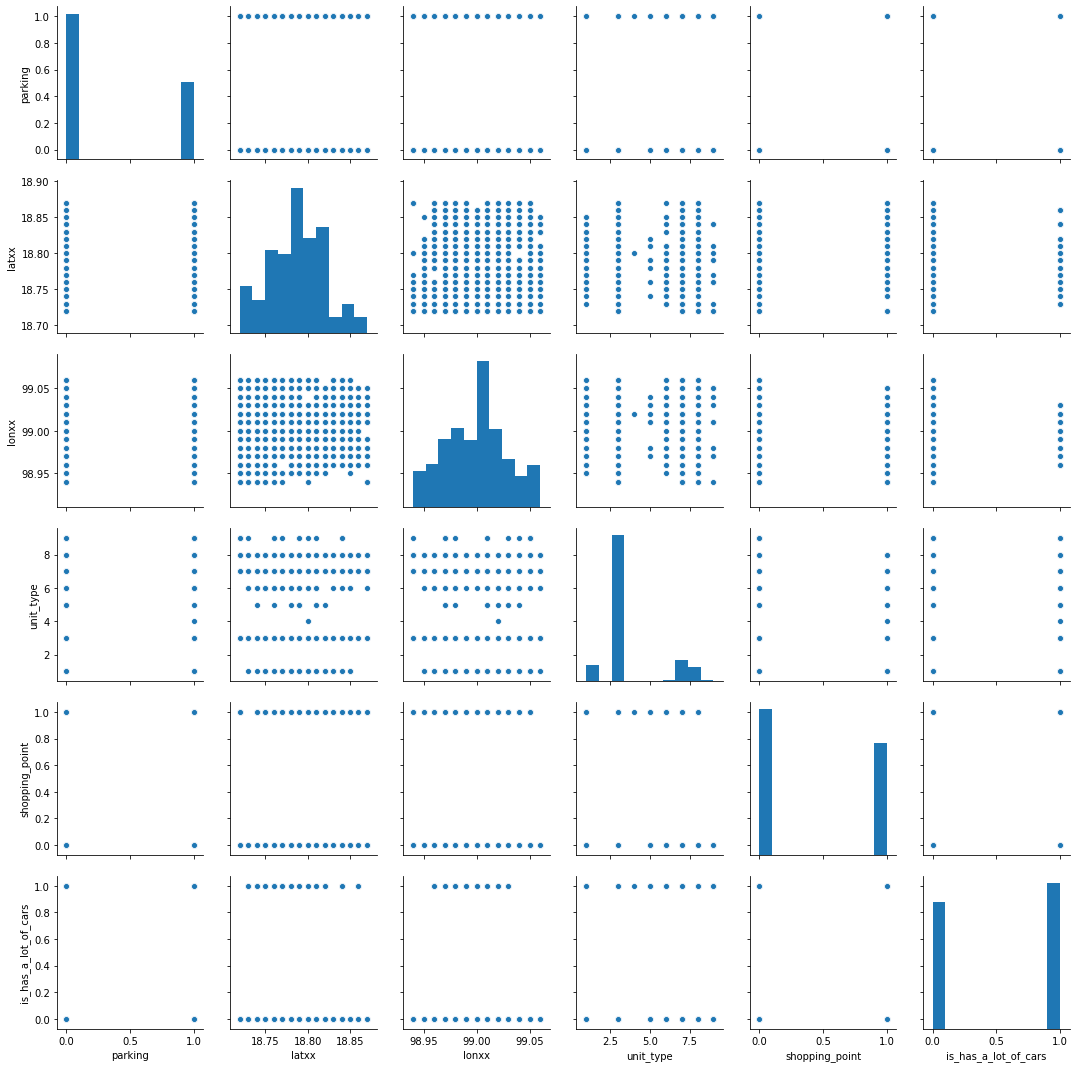

In [14]:
sns.pairplot(df)

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


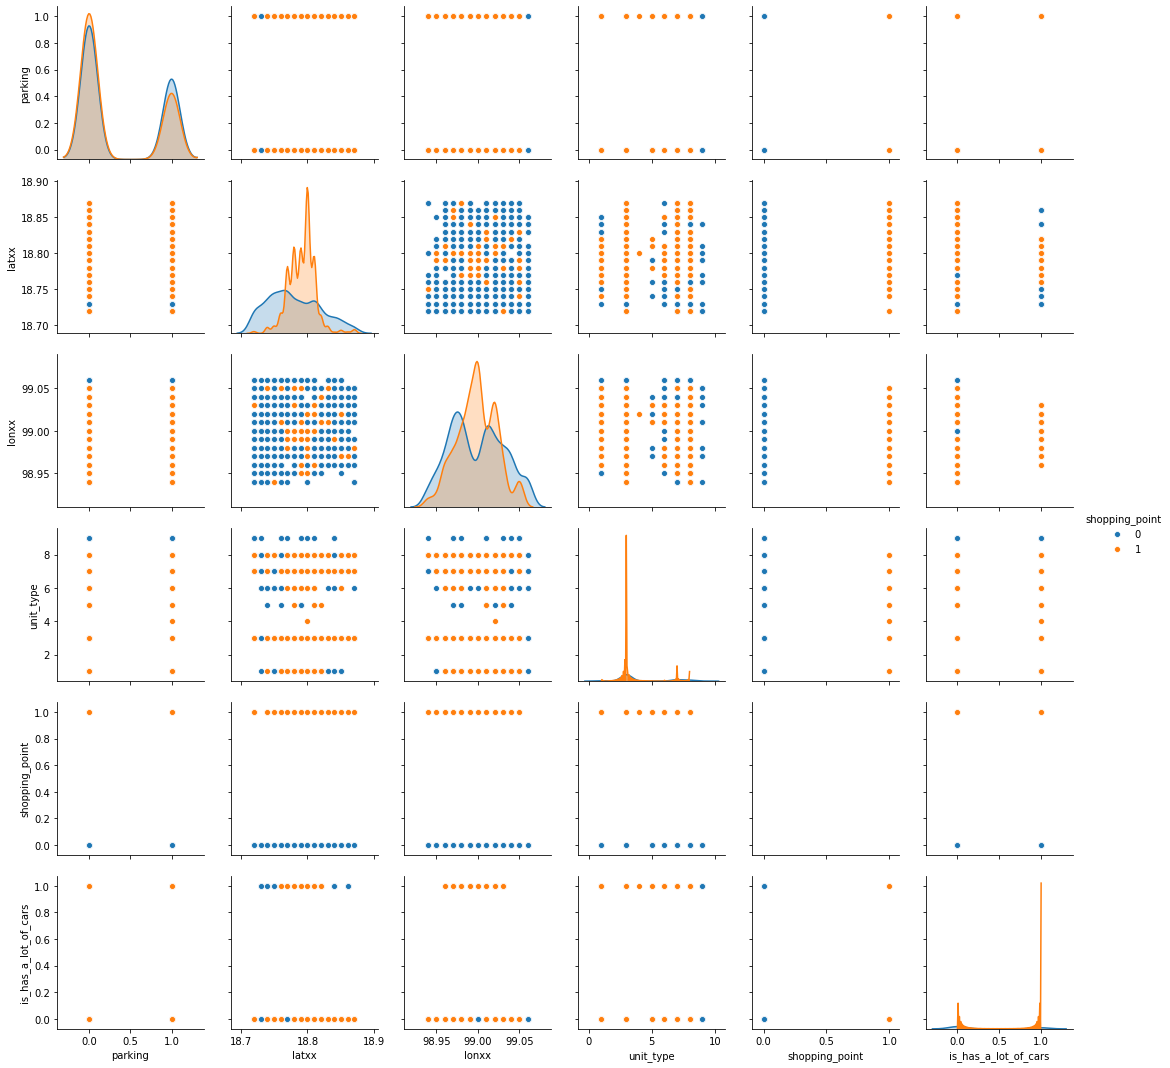

In [15]:
sns.pairplot(df, hue="shopping_point")

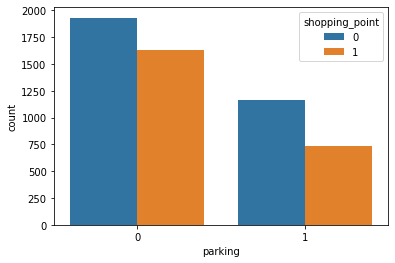

In [16]:
sns.countplot(x="parking", hue="shopping_point", data=df);

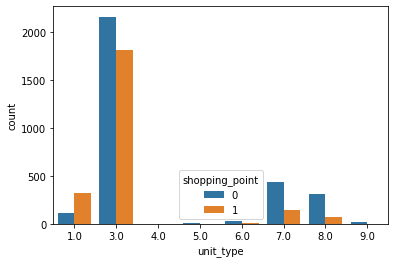

In [17]:
sns.countplot(x="unit_type", hue="shopping_point", data=df);

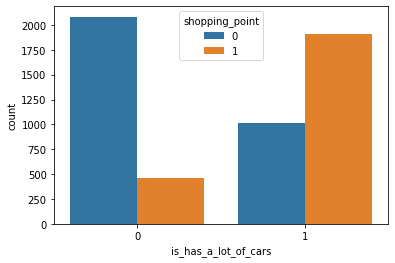

In [18]:
sns.countplot(x="is_has_a_lot_of_cars", hue="shopping_point", data=df);

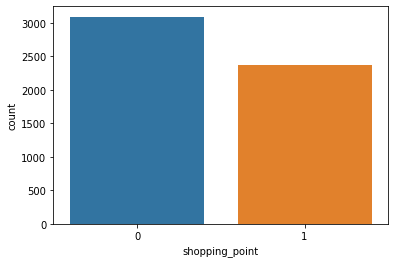

In [19]:
sns.countplot(x="shopping_point", data=df);

In [20]:
df.groupby('shopping_point').count()

,vid,duration,parking,latxx,lonxx,unit_type,is_has_a_lot_of_cars
shopping_point,,,,,,,
0,3092,3092,3092,3092,3092,3092,3092
1,2369,2369,2369,2369,2369,2369,2369


In [21]:
df.corr()

,parking,latxx,lonxx,unit_type,shopping_point,is_has_a_lot_of_cars
parking,1.000000,0.011557,0.040597,0.022740,-0.066112,0.048847
latxx,0.011557,1.000000,0.071079,-0.084308,0.174097,0.058186
lonxx,0.040597,0.071079,1.000000,0.110571,-0.006991,-0.054270
unit_type,0.022740,-0.084308,0.110571,1.000000,-0.240098,-0.219443
shopping_point,-0.066112,0.174097,-0.006991,-0.240098,1.000000,0.477388
is_has_a_lot_of_cars,0.048847,0.058186,-0.054270,-0.219443,0.477388,1.000000


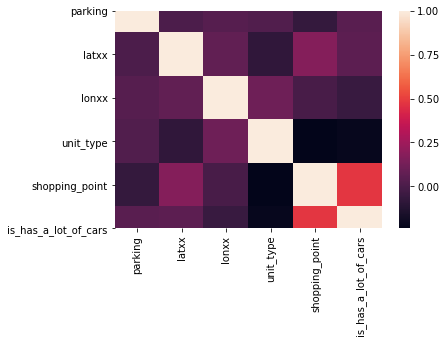

In [22]:
sns.heatmap(df.corr())

In [23]:
df.corr().sort_values("shopping_point")["shopping_point"]

unit_type              -0.240098
parking                -0.066112
lonxx                  -0.006991
latxx                   0.174097
is_has_a_lot_of_cars    0.477388
shopping_point          1.000000
Name: shopping_point, dtype: float64

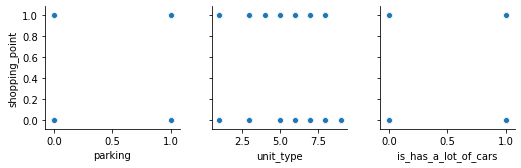

In [24]:
sns.pairplot(df, x_vars=['parking','unit_type','is_has_a_lot_of_cars'], y_vars=['shopping_point'])

In [25]:
################################# Feature Selection ###################################
X = df[['parking','unit_type','is_has_a_lot_of_cars']]
Y = df['shopping_point']


In [26]:
################################ Split the train and test dataset ########################
# print(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# print(Y_test)

In [27]:
# ############################## Build a model ####################################
clf = LogisticRegression()
clf.fit(X_train,Y_train)

# # clf = LogisticRegression()
# # clf.fit(X, Y)

# # clf = tree.DecisionTreeClassifier()
# # clf.fit(X, Y)

# clf = tree.DecisionTreeClassifier()
# clf.fit(X_train, Y_train)

# clf = svm.SVC()
# clf.fit(X_train,Y_train)

# # clf = svm.SVC()
# # clf.fit(X, Y)

# clf = KNeighborsClassifier(n_neighbors=5)
# clf.fit(X_train,Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
##################### Predict #####################
Y_pred = clf.predict(X_test)

In [29]:
##################### Report #####################
print("*********Confusion Matrix*********")
cm_labels = df['shopping_point'].unique()
print(cm_labels)
print(confusion_matrix(Y_test, Y_pred, labels = cm_labels))

print("**************Report**************")
print(classification_report(Y_test,Y_pred))

print("************* F1 ***************")
f1 = f1_score(Y_test, Y_pred, average = 'weighted')
print('F1 = ', f1)

*********Confusion Matrix*********
[0 1]
[[652 284]
 [165 538]]
**************Report**************
              precision    recall  f1-score   support

           0       0.80      0.70      0.74       936
           1       0.65      0.77      0.71       703

    accuracy                           0.73      1639
   macro avg       0.73      0.73      0.72      1639
weighted avg       0.74      0.73      0.73      1639

************* F1 ***************
F1 =  0.727442639508775
